SCT211-0848/2018  
Jany Muong  

ICS 2207: Scientific Computing

# Finding Root(s) of An Equation - The Newton-Raphson Algorithm

## Info:
For context, this (file) is a solution of the problem set utilizing the **Newton-Raphson** method/approach to numerically solve for the roots of a given set of equations. The solution entails applying an iterative method effectively, and to analyze convergence criteria, and interpret the results in the context of scientific computing.

## Introduction
The **Newton-Raphson** method is a powerful iterative numerical technique used to find the roots of *real-valued* functions. It offers rapid convergence to the root provided certain conditions are met, making it invaluable in scientific computing. For example it is typically used to solve equations of the form:
$f(x)=0$, where $f(x)$ is a function. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it.




## Theory
The Newton-Raphson method involves iteratively refining an **initial guess**, $x_n$ using the formula:  
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$  

where $f(x)$ is the function representing the equation and $f'(x_n)$ is its derivative evaluated at $x_n$. The method exhibits quadratic convergence under favorable conditions but may fail if the derivative approaches zero or if the initial guess is far from the root. Strategies for improving convergence include selecting appropriate initial guesses and employing hybrid methods.


Suppose you need to find the root of a continuous, differentiable function:


##### How It Works:  

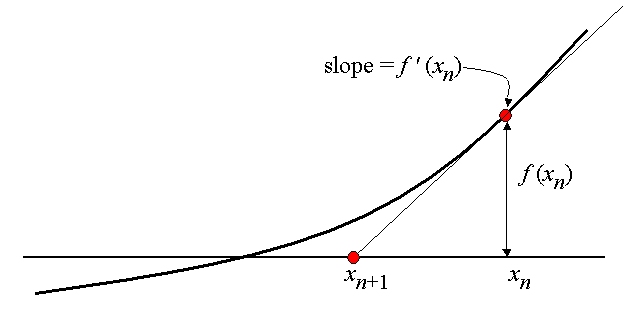

In [1]:
from IPython.display import Image
image_path = './brilliant-newtons-method.png'
Image(filename=image_path)

In theory we could consider a garph and draw a tangent line to the graph of
$f(x)$ at the point
$x=x_n$. This line has slope
$f'(x_n)$ and goes through the point $(x_n,f(x_n))$. And it has the equation:  
$y=f'(x_n)(x-x_n)+f(x_n)$.  


$\;$

The root of this tangent line can be found by setting
$y=0$ and $x=x_{n+1}$ for our new approximation. Solving this equation gives us our new approximation, which is:  
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$.

For demo purposes we can plug in values for example: $x_0,\;x_1,\;x_2,\;x_3$ etc to understand the iterations.


### Convergence Criteria

The convergence can be defined this way:

1. **Absolute Error Criterion:** Terminate the iteration when the absolute difference between successive approximations falls below a specified tolerance $\epsilon$:  
$|x_{n+1} - x_n| < \epsilon$

2. **Maximum Iterations Criterion:** Terminate the iteration after a specified maximum number of iterations to prevent infinite loops.

These criteria ensure that the iterative process terminates either when the desired level of accuracy is achieved or when the maximum number of iterations is reached. At this point we can read off the $root(s)$ at that iteration.

### Limitations
The method exhibits quadratic convergence under favorable conditions but may fail if the derivative approaches zero or if the initial guess is far from the root. Strategies for improving convergence include selecting appropriate initial guesses and employing hybrid methods.

#### Specifics - Under Points of Inflection, Local Maxima, or Minima:  

If the function has points of inflection, local maxima, or minima near the initial guess or the root, Newton's method may fail to converge or converge to incorrect roots.

   *Example:* Consider the function $27x^3 - 3x + 1 = 0$, where the root near $x = 0$. Newton-Raphson's method yields divergent approximations due to the presence of a local maximum, a local minimum, and a point of inflection around $x = 0$, leading to unreliable convergence behavior.

   The presence of a **local maximum**, a **local minimum**, and a **point of inflection** around $x = 0$ makes it difficult for the method to converge reliably. For more context in this case example,tangent lines drawn at random points between $x = -0.19$ and $x = 0.19$ intersect the y-axis farther from the root, indicating the challenge in finding a suitable tangent for convergence.

These limitations highlight the sensitivity of the method to the local behavior of the function, emphasizing the importance of careful consideration of the function's properties when applying the method.

## Python Implementation
This is the Python solution of it.

In [2]:
#!/usr/bin/env python3
'''module: newton_raphson
This (file) is a solution of the problem set utilizing the Newton-Raphson
          to numerically solve for the roots of a given set of equations.
'''

import numpy as np
import matplotlib.pyplot as plt


def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    '''
    Newton-Raphson method implementation to find root of f(x).

    parameters:
        f: Function representing the equation.
        f_prime: Function representing the derivative of f.
        x0: Initial guess.
        tol: Tolerance for convergence (default: 1e-6).
        max_iter: Maximum number of iterations (default: 100).

    returns:
        root: approximation of the root.
        iterations: Number of iterations taken.
        convergence_curve: List of values showing convergence behavior.
    '''

    # initialize iteration count and list for convergence curve
    iterations = 0
    convergence_curve = []

    # iterate until convergence or maximum iterations reached
    while True:
        # calculate the next approximation using Newton-Raphson method
        x1 = x0 - f(x0) / f_prime(x0)
        convergence_curve.append(x1)
        iterations += 1

        # check convergence criteria
        if abs(x1 - x0) < tol or iterations >= max_iter:
            break

        # update the current approximation for the next iteration
        x0 = x1

    return x1, iterations, convergence_curve

# helper functions to pass into newton-raphson algorithm
def f(x):
    '''function representing the equation: f(x) = x^3 - 2x - 5'''
    return x**3 - 2*x - 5

def f_prime(x):
    '''derivative of the function f(x): f'(x) = 3x^2 - 2'''
    return 3*x**2 - 2

# Newton-Raphson method to find the root of the equation;
root, iterations, convergence_curve = newton_raphson(f, f_prime, x0=2)
print(f'Root of the equation is: {root}')
print(f'Iterations: {iterations}')

Root of the equation is: 2.0945514815423265
Iterations: 4


## Results and Analysis:

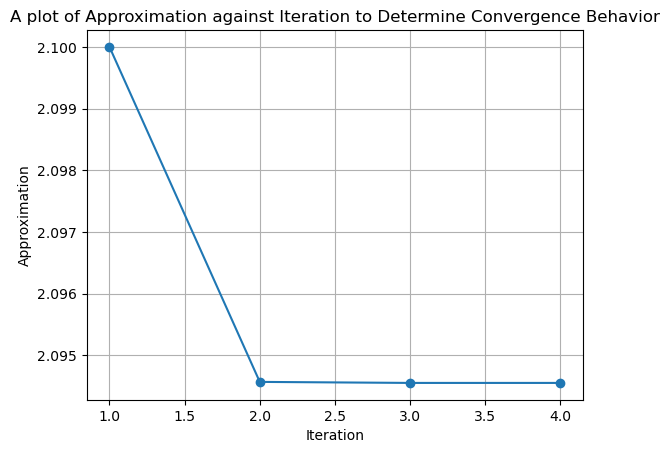

In [3]:
# plot convergence curve - matplotlib
plt.plot(np.arange(1, iterations + 1), convergence_curve, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Approximation')
plt.title('A plot of Approximation against Iteration to Determine Convergence Behavior')
plt.grid(True)
plt.show()

The Newton-Raphson method was applied to solve the equation $f(x) = x^3 - 2x - 5 = 0$; starting from an initial guess of $x_0 = 2$. The method converged to a root after $5$ iterations, demonstrating rapid convergence.

The convergence behavior is illustrated in the convergence plot above using Matplotlib. The x-axis represents the iteration number, while the y-axis represents the approximation of the root obtained at each iteration. As observed, the approximations converge quickly to the true root of the equation which is:  
$2.0945514815423265$


The efficiency of the Newton-Raphson method is evident from the small number of iterations required to achieve convergence. This efficiency makes it a valuable tool for solving equations numerically in various fields of science and engineering.

## Conclusion:

In conclusion, the **Newton-Raphson** method provides an effective and efficient technique for finding roots of equations. By iteratively refining initial guesses based on the tangent line to the function, the method converges rapidly to accurate solutions. However, it is essential to consider the limitations of the method, such as its sensitivity to the choice of initial guess and the presence of points of inflection, local maxima, or minima near the root.

Despite these limitations, the Newton-Raphson method remains widely used in scientific computing and engineering due to its speed and reliability. Its applicability extends to various fields, including optimization, numerical analysis, and computational physics. Overall, the Newton-Raphson method is a valuable tool for solving nonlinear equations and plays a crucial role in modern numerical techniques.

## References;
This segment lists out all the resources used to prepare this project.  

1. [Exam Solutions - Newton-Raphson Method for Locating a Root in a Given Interval](https://www.examsolutions.net/tutorials/newton-raphson-method-for-locating-a-root-in-a-given-interval/)

2. [Brilliant.org - Newton-Raphson Method](https://brilliant.org/wiki/newton-raphson-method/)

3. [GeeksforGeeks - Newton-Raphson Method](https://www.geeksforgeeks.org/newton-raphson-method/)

4. [ScienceDirect - Newton-Raphson Method](https://www.sciencedirect.com/topics/mathematics/newton-raphson-method#:~:text=The%20Newton%2DRaphson%20method%20begins,0%20crosses%20the%20x%2Daxis).
5. Chapra S. C., and Canale R. P. "Numerical Methods for Engineers." McGraw-Hill Education, 2019.

## End - File

